# PDP Comparison part 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from RashomonSetAnalyser import RashomonSetAnalyser

In [3]:
rashomon = RashomonSetAnalyser()
rashomon.pdp_measures = pd.read_csv('abs_sum.csv')

In [4]:
rashomon.pdp_measures.head()

,colname,model0,model1,model2,model3,model4,model5,model6,model7,model8
0,albumin_min,0.895708,1.094565,1.101840,0.639512,0.796659,0.132743,0.520099,0.811134,0.312614
1,bicarbonate_min,0.823801,0.984589,1.078355,0.528898,0.841015,0.206143,0.380499,1.014646,0.592612
2,bun_min,0.776521,0.472627,0.804022,0.629305,0.489900,0.039225,0.189107,0.600329,0.511266
3,calcium_min,1.430521,2.199248,2.140283,1.534680,1.547932,1.145182,1.136423,1.589801,1.202206
4,creatinine_min,0.568789,1.775589,1.311487,0.655352,0.605490,0.560761,0.166061,0.644348,0.498596


Boxplots per feature

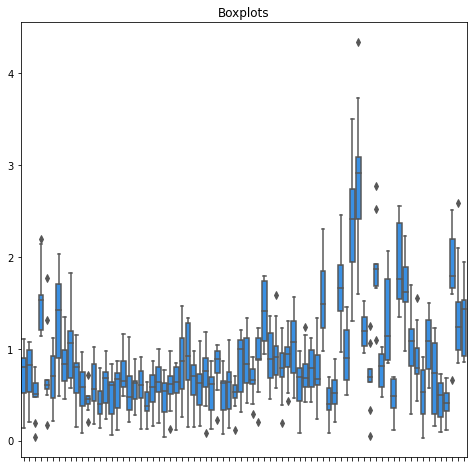

In [5]:
rashomon.boxplots()

Boxplot per model

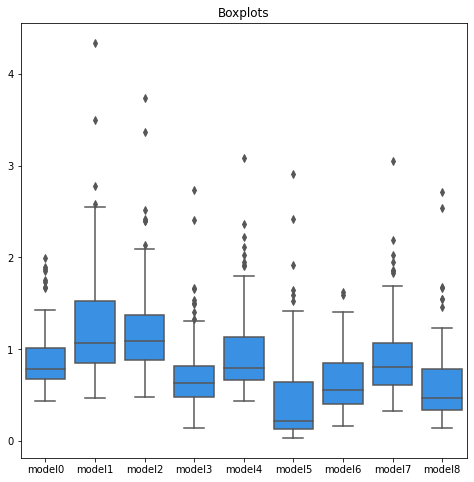

In [6]:
rashomon.boxplots_models()

### PDP Curves

In [7]:
import pickle
X = np.load("X48.npy")
column_names = np.load('column_names.npy', allow_pickle = True)
X = pd.DataFrame(data = X, columns = column_names)
with open('y.npy', 'rb') as f:
    labels = pickle.load(f)
    
task = [yy[0] for yy in labels]
y = np.array(task)

In [8]:
with open('top_eight_models.npy', 'rb') as f:
    models = pickle.load(f)
    
with open('base_model.npy', 'rb') as f:
    base_model = pickle.load(f)

In [9]:
rashomon.models = models
rashomon.base_model = base_model

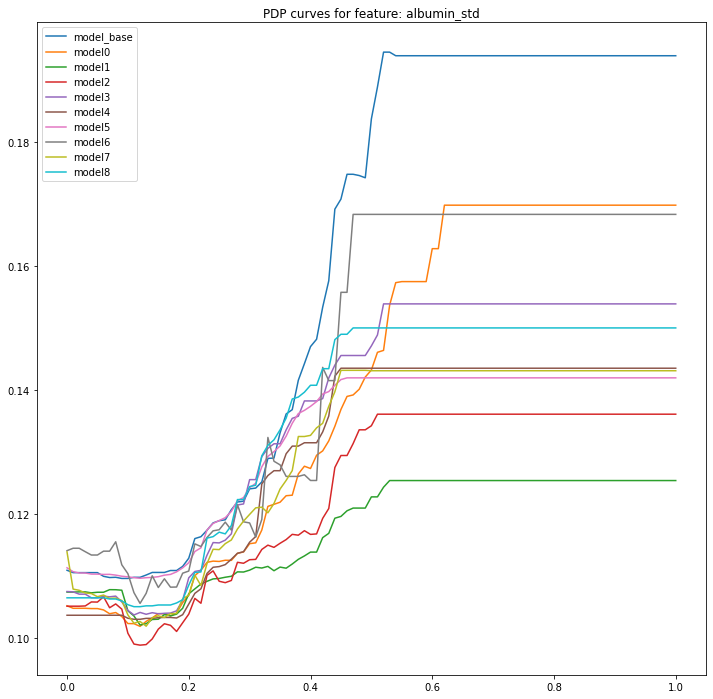

In [10]:
# to ta zmienna, co wcześniej zawsze była na górze
rashomon.pdp_profile(X, y, features = ['albumin_std'], figsize=(12, 12))

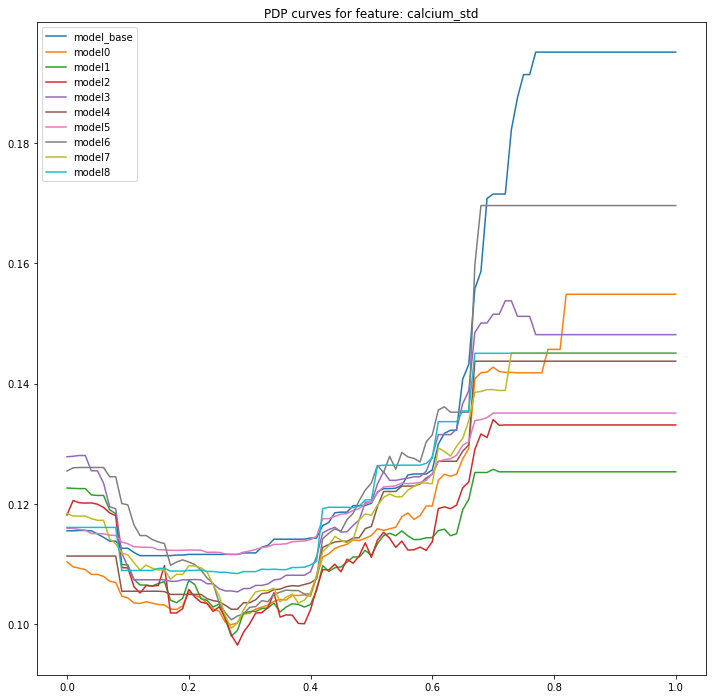

In [11]:
# ta, co często na wierzchu była
rashomon.pdp_profile(X, y, features = ['calcium_std'], figsize=(12, 12))